# Bag of Words Meets Bags of Popcorn

Filename: movie-review-model.ipynb \
Author: Timothy Holland \
Last updated: 14/06/2024 \
Kaggle competition: https://www.kaggle.com/c/word2vec-nlp-tutorial/data

## Data Summary

In [1]:
import pandas as pd

train_data = pd.read_csv('word2vec-nlp-tutorial/labeledTrainData.tsv', sep='\t')

# Load the test data
test_data = pd.read_csv('word2vec-nlp-tutorial/testData.tsv', sep='\t')

# Load unsupervised
unsupervised_train_data = pd.read_csv('word2vec-nlp-tutorial/unlabeledTrainData.tsv', sep='\t', on_bad_lines='skip')

In [2]:
from collections import Counter

# Print the first few rows of the training data
print("First few rows of the training data:")
print(train_data.head())

# Get the total number of samples
total_train_samples = len(train_data)
total_test_samples = len(test_data)
print(f"\nTotal number of training samples: {total_train_samples}")
print(f"Total number of test samples: {total_test_samples}")

# Get the unique sentiments and their counts (only for training data)
sentiment_counts = Counter(train_data['sentiment'])
print("\nSentiment distribution (training data):")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count} ({count/total_train_samples*100:.2f}%)")

# Get the average length of the reviews
avg_train_review_length = train_data['review'].apply(len).mean()
avg_test_review_length = test_data['review'].apply(len).mean()
print(f"\nAverage training review length: {avg_train_review_length:.2f} characters")
print(f"Average test review length: {avg_test_review_length:.2f} characters")

# Get the number of unique words in the reviews (combining train and test data)
unique_words = set()
train_data['review'].str.lower().str.split().apply(unique_words.update)
test_data['review'].str.lower().str.split().apply(unique_words.update)
print(f"\nNumber of unique words (in both train and test): {len(unique_words)}")

# Print a random sample from the training data
print("\nRandom sample from training data:")
sample = train_data.sample().iloc[0]
print(f"ID: {sample['id']}")
print(f"Review: {sample['review'][:200]}...") # Print first 200 characters
print(f"Sentiment: {sample['sentiment']}")

# Calculate correlation between review length and sentiment (only for training data)
train_data['review_length'] = train_data['review'].apply(len)
correlation = train_data['review_length'].corr(train_data['sentiment'])
print(f"\nCorrelation between review length and sentiment (training data): {correlation:.4f}")

# Print the most common words (combining train and test data)
word_counts = Counter()
train_data['review'].str.lower().str.split().apply(word_counts.update)
test_data['review'].str.lower().str.split().apply(word_counts.update)
print("\nTop 10 most common words (in both train and test):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

First few rows of the training data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...

Total number of training samples: 25000
Total number of test samples: 25000

Sentiment distribution (training data):
1: 12500 (50.00%)
0: 12500 (50.00%)

Average training review length: 1327.71 characters
Average test review length: 1296.44 characters

Number of unique words (in both train and test): 401572

Random sample from training data:
ID: 5106_4
Review: ALIEN LOVE ( As this movie is known in Britain ) is a very strange movie . I don`t mean that it`s an esoteric art house movie in the style of Peter Greenaway or Derek 

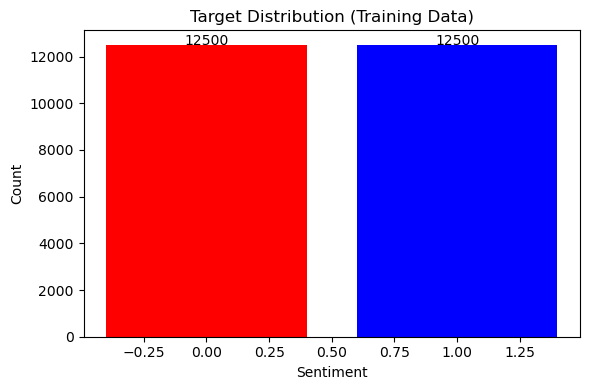

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of positive and negative sentiments
sentiment_counts = train_data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Target Distribution (Training Data)')
plt.xticks(rotation=0)

# Add count labels on top of the bars
for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

## Data Processing

#### Lemmatising

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (uncomment these lines if you haven't downloaded them before)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Preprocessing functions
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply the preprocessing function to the 'review' column for both train and test data
train_data['preprocessed_review'] = train_data['review'].apply(preprocess_text)
test_data['preprocessed_review'] = test_data['review'].apply(preprocess_text)
unsupervised_train_data['preprocessed_review'] = unsupervised_train_data['review'].apply(preprocess_text)

# Print the first few rows of the preprocessed training data
print("Preprocessed training data:")
print(train_data[['id', 'sentiment', 'preprocessed_review']].head())

# Print the first few rows of the preprocessed test data
print("\nPreprocessed test data:")
print(test_data[['id', 'preprocessed_review']].head())

# Unsupervised data
print("\nPreprocessed training data:")
print(unsupervised_train_data[['id', 'preprocessed_review']].head())

Preprocessed training data:
       id  sentiment                                preprocessed_review
0  5814_8          1  stuff going moment mj ive started listening mu...
1  2381_9          1  classic war world timothy hines entertaining f...
2  7759_3          0  film start manager nicholas bell giving welcom...
3  3630_4          0  must assumed praised film greatest filmed oper...
4  9495_8          1  superbly trashy wondrously unpretentious explo...

Preprocessed test data:
         id                                preprocessed_review
0  12311_10  naturally film who main theme mortality nostal...
1    8348_2  movie disaster within disaster film full great...
2    5828_4  movie kid saw tonight child loved one point ki...
3    7186_2  afraid dark left impression several different ...
4   12128_7  accurate depiction small time mob life filmed ...

Preprocessed training data:
        id                                preprocessed_review
0   9999_0  watching time chaser obvious made 

Information on lemmatized reviews.

In [18]:
import pandas as pd

# Function to get review length statistics
def get_review_length_stats(df, column_name):
    df['review_length'] = df[column_name].apply(lambda x: len(x.split()))
    max_length = df['review_length'].max()
    longest_review_index = df['review_length'].idxmax()
    longest_review = df.loc[longest_review_index, column_name]
    length_stats = df['review_length'].describe()
    
    print(f"Length of the longest review: {max_length} words")
    print(f"Index of the longest review: {longest_review_index}")
    print(f"The longest review:\n{longest_review}")
    print("\nReview length statistics:")
    print(length_stats)
    
    # Remove the temporary 'review_length' column
    df = df.drop('review_length', axis=1)
    
    return max_length

# For train_data
print("Statistics for train_data:")
test_max_length = get_review_length_stats(train_data, 'preprocessed_review')
print("\n" + "="*50 + "\n")

# For test_data
print("Statistics for test_data:")
test_max_length = get_review_length_stats(test_data, 'preprocessed_review')
print("\n" + "="*50 + "\n")

# For unsupervised_train_data
print("Statistics for unsupervised_train_data:")
unsupervised_max_length = get_review_length_stats(unsupervised_train_data, 'preprocessed_review')

# Compare the maximum lengths
print("\n" + "="*50 + "\n")
print("Comparison of maximum lengths:")
print(f"test_data max length: {test_max_length}")
print(f"unsupervised_train_data max length: {unsupervised_max_length}")
print(f"Overall maximum length: {max(test_max_length, unsupervised_max_length)}")

Statistics for train_data:
Length of the longest review: 1440 words
Index of the longest review: 3485
The longest review:
match tag team table match bubba ray spike dudley v eddie guerrero chris benoit bubba ray spike dudley started thing tag team table match eddie guerrero chris benoit according rule match opponent go table order get win benoit guerrero heated early taking turn hammering first spike bubba ray german suplex benoit bubba took wind dudley brother spike tried help brother referee restrained benoit guerrero ganged corner benoit stomping away bubba guerrero set table outside spike dashed ring somersaulted top rope onto guerrero outside recovering taking care spike guerrero slipped table ring helped wolverine set tandem set double superplex middle rope would put bubba table spike knocked table right brother came crashing guerrero benoit propped another table corner tried irish whip spike bubba dashed blocked brother bubba caught fire lifted opponent back body drop bubba slam

Length of the longest review: 1355 words
Index of the longest review: 19413
The longest review:
spoiler spoiler first godzilla movie third movie series whereas godzilla v destoroyah previous entry aptly ended second series else say well let break downbr br liked nd series godzilla movie even though found something annoying movie either bad good guy godzilla sympathetic human character came obnoxious along came movie called gamera guardian universe two successful sequel directed master filmmaker shuusuke kaneko singlehandedly changed face japanese monster movie forever spoiled series godzilla movie suddenly looked halfhearted heavyhanded autopiloted lazy attempt recreating original godzilla end insult memory genre master ishirou honda eiji tsuburaya gamera awakening iris released year film simply incredible hollywood moviegoer saw movie would never look japanese monster movie way againbr br along came tristars gino godzilla name understandably met bitter hatred true godzilla fan world w

#### Embedding

In [5]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# Combine preprocessed reviews from train, test, and unsupervised data, and train Word2Vec
all_sentences = [review.split() for review in train_data['preprocessed_review']] + \
                [review.split() for review in test_data['preprocessed_review']] + \
                [review.split() for review in unsupervised_train_data['preprocessed_review']]

# Train Word2Vec model on all data
wv_model = Word2Vec(all_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Derives average word vector
def get_average_word_vector(words, wv_model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in wv_model.wv:
            n_words += 1
            feature_vector = np.add(feature_vector, wv_model.wv[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Display embedding
print("Vocabulary size:", len(wv_model.wv.key_to_index))
print("\nDimensions of word vectors:", wv_model.vector_size)

# Get average vector for a sample review from training data
sample_review = train_data['preprocessed_review'].iloc[0]
avg_vector = get_average_word_vector(sample_review.split(), wv_model, wv_model.vector_size)
print("\nAverage vector for a sample review (training data):")
print(avg_vector)

Vocabulary size: 257886

Dimensions of word vectors: 100

Average vector for a sample review (training data):
[ 0.21311033  0.2587902  -0.89789444  0.39163363  0.23921847 -0.48524457
  0.5665608   0.90592825 -0.12520047 -0.34359008  0.9042278   0.18666114
 -0.06744578 -0.01382556  0.11531208 -0.01444387  0.09983474  0.00583045
  0.15712683 -0.20074297 -0.02159882 -0.46001384 -0.27864578 -0.2283398
  0.56679183  0.67200947 -0.42654848 -0.7427502  -0.15135667  0.7206966
  0.36326635 -0.03746375 -0.8000324  -0.30049163  0.55858326 -0.43706036
 -0.19627316  0.4241392   0.37217122  0.08967719 -0.11035868 -0.77320707
  0.3705234  -0.25528434  0.28893948 -0.5016297   0.33566254 -0.68243706
  0.2889475  -0.5142684   0.02749995  0.58909863 -0.01237858 -0.03684758
  0.35182467 -0.29943523 -0.05105184  0.12661356 -0.18072203  0.86697334
 -0.22893004 -0.5779158   0.16891049 -0.06618913  0.27649552  0.34887502
  0.8535697   0.53263366 -0.4762505   0.00755484  0.17414032 -0.5778382
  0.12134818  0.1

#### Feature Vectors

Sentences into average embeddings

In [6]:
import numpy as np
import pandas as pd

# Feature vectors of each review in train, test, and unsupervised data
X_train_average = np.array([get_average_word_vector(review.split(), wv_model, wv_model.vector_size) for review in train_data['preprocessed_review']])
y_train = train_data['sentiment']

X_test_average = np.array([get_average_word_vector(review.split(), wv_model, wv_model.vector_size) for review in test_data['preprocessed_review']])

X_unsupervised_average = np.array([get_average_word_vector(review.split(), wv_model, wv_model.vector_size) for review in unsupervised_train_data['preprocessed_review']])

# Combine the feature vectors from train, test, and unsupervised data
X_all_average = np.vstack((X_train_average, X_test_average, X_unsupervised_average))

# Convert sentiment labels to binary (0 and 1) for training data
y_train = pd.get_dummies(y_train, drop_first=True).iloc[:, 0]

print("Shape of X_train:", X_train_average.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test_average.shape)
print("Shape of X_unsupervised:", X_unsupervised_average.shape)
print("Shape of X_all:", X_all_average.shape)

Shape of X_train: (25000, 100)
Shape of y_train: (25000,)
Shape of X_test: (25000, 100)
Shape of X_unsupervised: (49998, 100)
Shape of X_all: (99998, 100)


Sentences into composite embeddings

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

# Step 1: Create vocabulary and index words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['preprocessed_review'] + test_data['preprocessed_review'])
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for padding

# Step 2: Convert reviews to sequences of indices
X_train_seq = tokenizer.texts_to_sequences(train_data['preprocessed_review'])
X_test_seq = tokenizer.texts_to_sequences(test_data['preprocessed_review'])

# Pad sequences
max_sequence_length = 100 
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Step 3: Create embedding matrix
embedding_dim = wv_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in wv_model.wv:
        embedding_matrix[i] = wv_model.wv[word]

Sentences entirely encoded using BERT

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from tqdm import tqdm

# Install tqdm if you haven't already
# !pip install tqdm

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to create BERT embeddings with progress bar
def get_bert_embeddings(texts, desc="Creating embeddings"):
    embeddings = []
    for text in tqdm(texts, desc=desc):
        inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeddings)

# Create embeddings for train, unsupervised, and test data
print("Creating embeddings for train data...")
train_embeddings = get_bert_embeddings(train_data['preprocessed_review'], desc="Train data")

print("Creating embeddings for unsupervised data...")
unsupervised_embeddings = get_bert_embeddings(unsupervised_train_data['preprocessed_review'], desc="Unsupervised data")

print("Creating embeddings for test data...")
test_embeddings = get_bert_embeddings(test_data['preprocessed_review'], desc="Test data")

In [ ]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42)
lr_model.fit(train_embeddings, y_train)

# Make predictions on test data
y_pred = lr_model.predict(test_embeddings)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## Models

#### KNN

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Create the KNN classifier & grid search hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Derive best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score

# Hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Instantiate LR & grid search
lr_model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_average, y_train)

# Get the best model and its parameters
best_lr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters:", best_params)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_lr_model, X_train_average, y_train, cv=5, scoring='roc_auc')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit best model
best_lr_model.fit(X_train_average, y_train)

Adding self-learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

# Split the original labeled training data into train and validation sets
from sklearn.model_selection import train_test_split
X_train_labeled, X_val, y_train_labeled, y_val = train_test_split(X_train_average, y_train, test_size=0.2, random_state=42)

# Hyperparameters
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Instantiate LR & grid search
lr_model = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_labeled, y_train_labeled)

# Get the best model and its parameters
best_lr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters:", best_params)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_lr_model, X_train_labeled, y_train_labeled, cv=5, scoring='roc_auc')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit best model
best_lr_model.fit(X_train_labeled, y_train_labeled)



In [ ]:
# Initialize semi-supervised model
semi_lr_model = best_lr_model

# Self-learning loop
num_iterations = 5
for i in range(num_iterations):
    # Predict labels for unsupervised data
    y_unsupervised_pred = semi_lr_model.predict(X_unsupervised_average)
    
    # Select high-confidence predictions
    confidence_threshold = 0.98
    high_confidence_mask = (semi_lr_model.predict_proba(X_unsupervised_average).max(axis=1) > confidence_threshold)
    
    # Add high-confidence predictions to the training set
    X_train_augmented = np.concatenate((X_train_labeled, X_unsupervised_average[high_confidence_mask]), axis=0)
    y_train_augmented = np.concatenate((y_train_labeled, y_unsupervised_pred[high_confidence_mask]), axis=0)
    
    # Retrain the model with the augmented training set
    semi_lr_model.fit(X_train_augmented, y_train_augmented)
    
    print(f"Iteration {i+1} completed. Training set size: {len(y_train_augmented)}")

# Evaluate the final semi-supervised model on the hold-out validation set
y_val_pred = semi_lr_model.predict(X_val)
val_roc_auc = roc_auc_score(y_val, y_val_pred)
print("Validation ROC AUC score:", val_roc_auc)

In [ ]:
final_lr_model = semi_lr_model
y_pred = final_lr_model.predict_proba(X_test_average)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

#### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Grid search on Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_average, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters:", best_params)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_average, y_train, cv=5, scoring='roc_auc')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fit the best model
best_rf_model.fit(X_train_average, y_train)

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Cross-validation scores: [0.91806904 0.91793608 0.91464408 0.92138672 0.90829304]
Mean cross-validation score: 0.916065792


RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42, probability=True)
roc_auc_scorer = make_scorer(roc_auc_score)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring=roc_auc_scorer)
print("Cross-validation scores:", cv_scores)
print(f"Mean ROC AUC: {cv_scores.mean():.2f}")
print(f"Standard deviation: {cv_scores.std():.2f}")

#### MLP
Utilises padded embedded sentences.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Ensure y_train is the correct shape and type
y_train = np.array(y_train).astype('float32')

def create_model():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
        Bidirectional(LSTM(128, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Prepare the validation data
validation_split = 0.2
validation_size = int(len(X_train_padded) * validation_split)
X_val_padded = X_train_padded[:validation_size]
y_val = y_train[:validation_size]
X_train_padded = X_train_padded[validation_size:]
y_train = y_train[validation_size:]

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
epochs = 20
batch_size = 64

history = model.fit(X_train_padded, y_train, 
                    epochs=epochs, batch_size=batch_size, 
                    validation_data=(X_val_padded, y_val), 
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val_padded, y_val, verbose=0)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Utilises average of sentence embeddings

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train_average and y_train are already defined
# X_train_average: numpy array of shape (n_samples, embedding_size)
# y_train: numpy array of shape (n_samples,)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_average, y_train, test_size=0.2, random_state=42)

# Get the input shape
input_shape = X_train.shape[1]

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(X_val, y_val),
                    verbose=1)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_val, y_pred_classes))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred_classes))

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.7281 - loss: 1.4482 - val_accuracy: 0.8292 - val_loss: 0.5104 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8507 - loss: 0.4713 - val_accuracy: 0.8502 - val_loss: 0.4436 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8468 - loss: 0.4492 - val_accuracy: 0.8570 - val_loss: 0.4237 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8359 - loss: 0.4492 - val_accuracy: 0.8520 - val_loss: 0.4176 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8452 - loss: 0.4301 - val_accuracy: 0.8546 - val_loss: 0.4096 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8414 - loss: 0.4314 - val_accuracy: 0.8600 - val_loss: 0.4046 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8464 - loss: 0.4305

In [ ]:
best_model = model

#### Autoencoder

## Predictions

In [ ]:
import csv

# # Predictions & conversions for submission
# y_pred_int = y_pred.astype(int)
# y_pred_binary = (y_pred > 0.5).astype(int).flatten()

submission_df = pd.DataFrame({'id': test_data['id'], 'sentiment': y_pred_binary})
submission_df['id'] = submission_df['id'].astype(str)

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)
print("Predictions saved to 'submission.csv'")